In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2016.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2016,18023,54,17,3498
1,2016,17209,282,33,3557
2,2016,17343,248,26,3502
3,2016,17534,342,24,3546
4,2016,18002,226,38,3563
...,...,...,...,...,...
1869,2016,17499,73,42,3517
1870,2016,17501,326,36,3551
1871,2016,17848,213,14,3528
1872,2016,17689,373,41,3548


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1874, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1874 non-null   int64
 1   Maximum length (m))  1874 non-null   int64
 2   Recession(m),        1874 non-null   int64
 3   Rate/yr(m)           1874 non-null   int64
 4   Snout altitude (m)   1874 non-null   int64
dtypes: int64(5)
memory usage: 73.3 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1874


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2016,18023,54,17,3498
1,2016,17209,282,33,3557
2,2016,17343,248,26,3502
3,2016,17534,342,24,3546
4,2016,18002,226,38,3563


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0182,0.0109,0.0178
"Recession(m),",NaN,-0.0182,1.0000,-0.0018,-0.0199
Rate/yr(m),NaN,0.0109,-0.0018,1.0000,-0.0082
Snout altitude (m),NaN,0.0178,-0.0199,-0.0082,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0178
Rate/yr(m)             0.0109
Recession(m),         -0.0182
Year                      NaN
Name: Maximum length (m)), dtype: float64

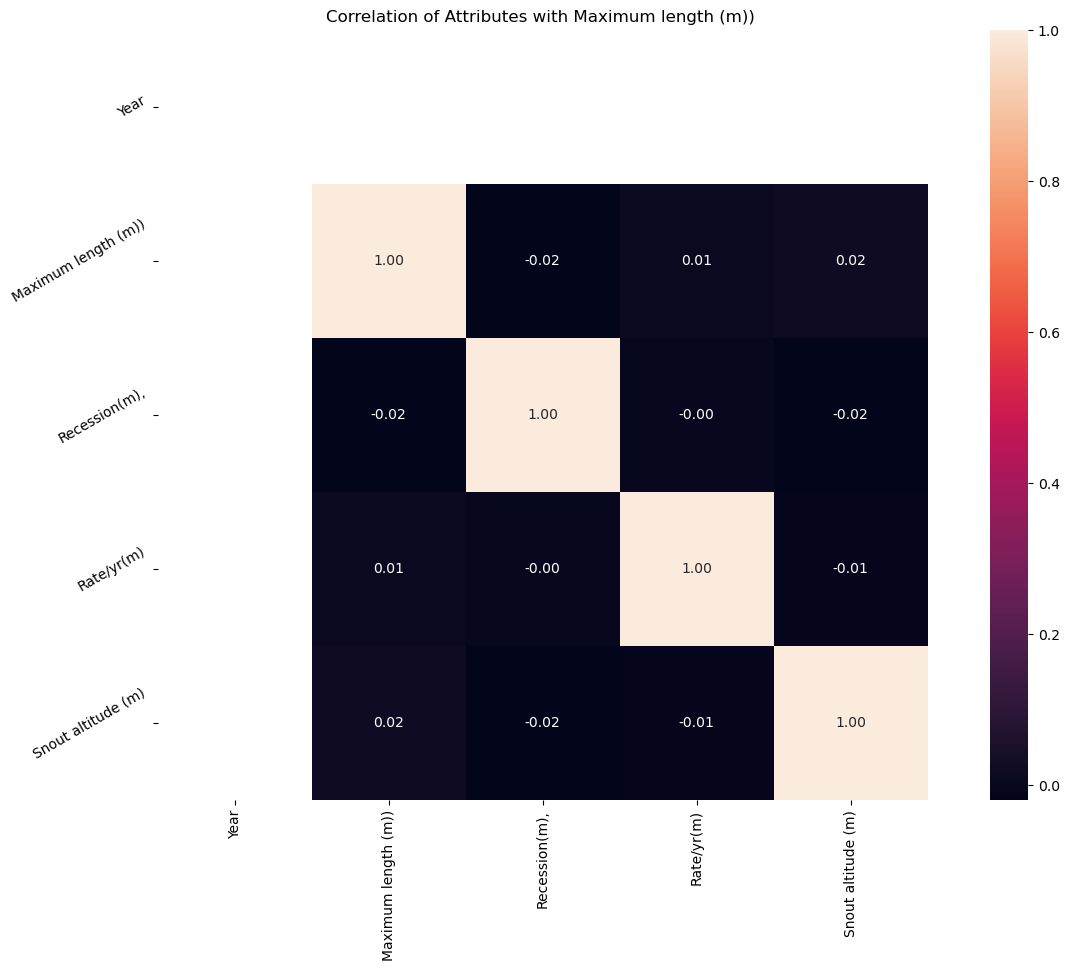

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,874.0000","1,874.0000","1,874.0000","1,874.0000","1,874.0000"
mean,"2,016.0000","17,547.0790",217.2855,27.5768,"3,532.0945"
std,0.0000,298.3849,125.2694,8.7987,21.0542
min,"2,016.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,016.0000","17,294.2500",109.2500,20.0000,"3,514.0000"
50%,"2,016.0000","17,550.0000",215.5000,28.0000,"3,532.0000"
75%,"2,016.0000","17,806.0000",324.7500,35.0000,"3,551.0000"
max,"2,016.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2016   1.0000
Name: Year, dtype: float64

145   0.0064
231   0.0059
55    0.0053
56    0.0053
112   0.0053
       ...  
228   0.0005
280   0.0005
70    0.0005
379   0.0005
169   0.0005
Name: Recession(m),, Length: 435, dtype: float64

36   0.0411
34   0.0400
38   0.0400
42   0.0384
16   0.0384
32   0.0363
14   0.0363
15   0.0358
13   0.0352
40   0.0352
19   0.0342
25   0.0342
24   0.0342
22   0.0336
21   0.0336
18   0.0331
33   0.0320
29   0.0320
37   0.0320
35   0.0315
28   0.0309
27   0.0304
41   0.0299
30   0.0299
31   0.0293
23   0.0293
20   0.0288
39   0.0283
26   0.0283
17   0.0277
Name: Rate/yr(m), dtype: float64

3525   0.0203
3505   0.0192
3561   0.0192
3503   0.0192
3539   0.0187
        ...  
3507   0.0096
3509   0.0091
3535   0.0091
3547   0.0085
3496   0.0032
Name: Snout altitude (m), Length: 72, dtype: float64



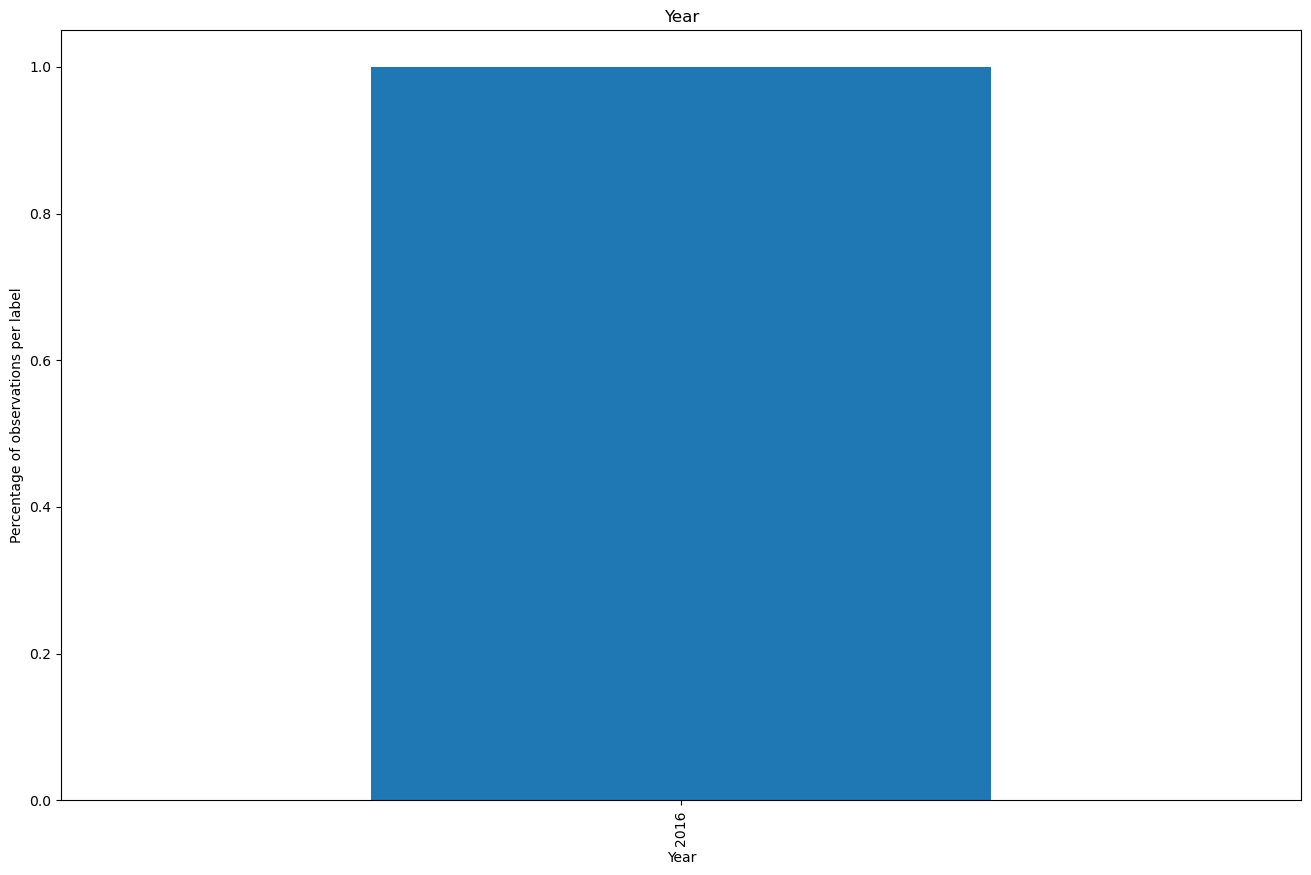

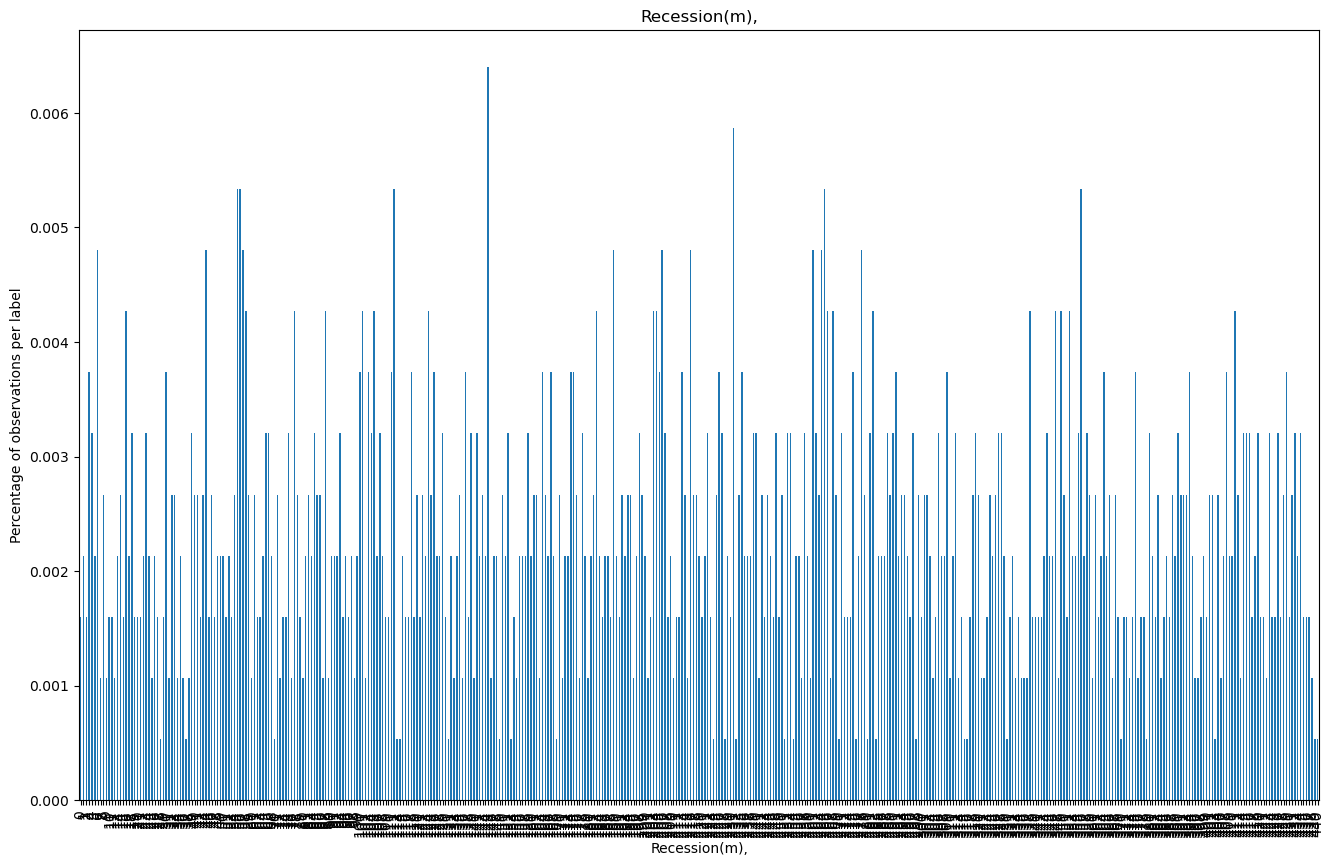

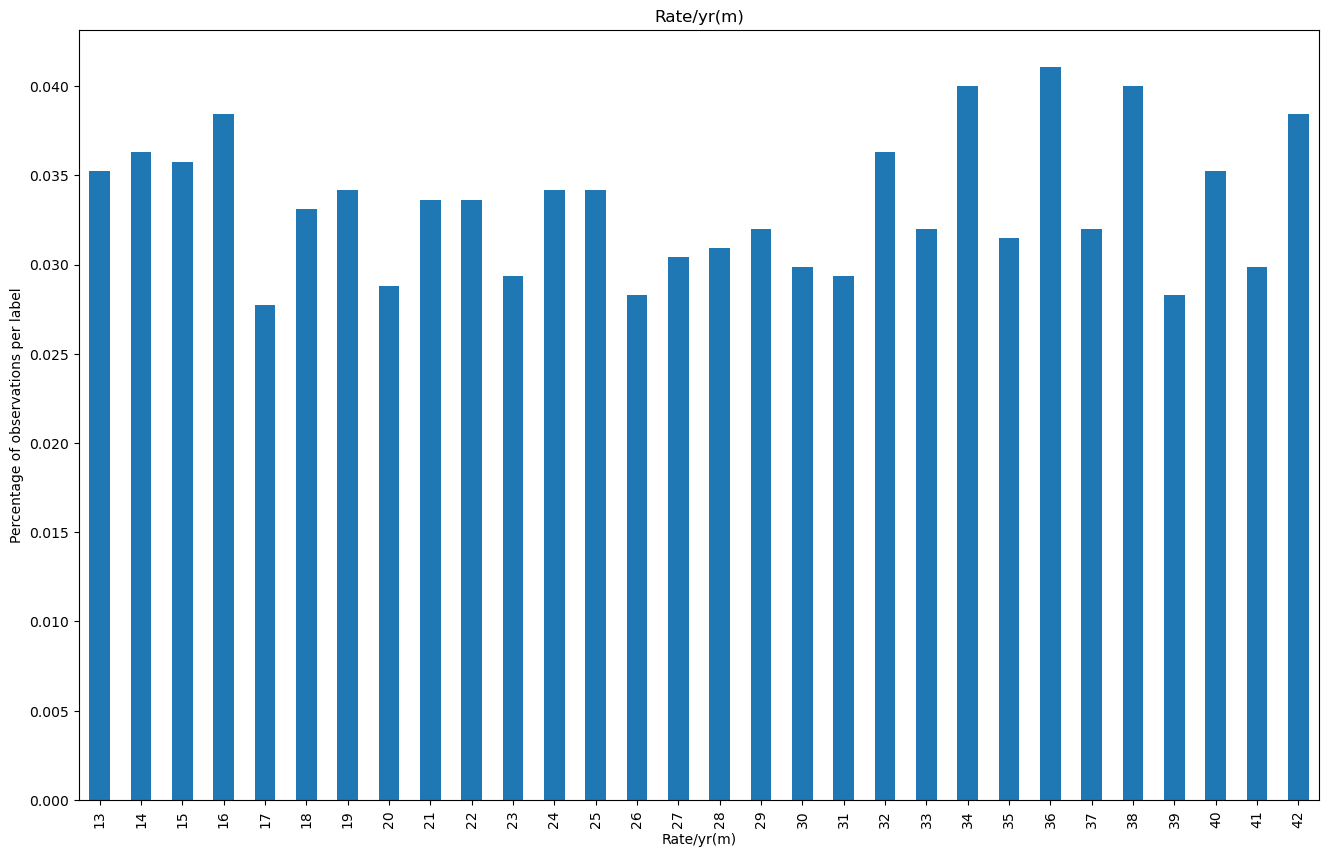

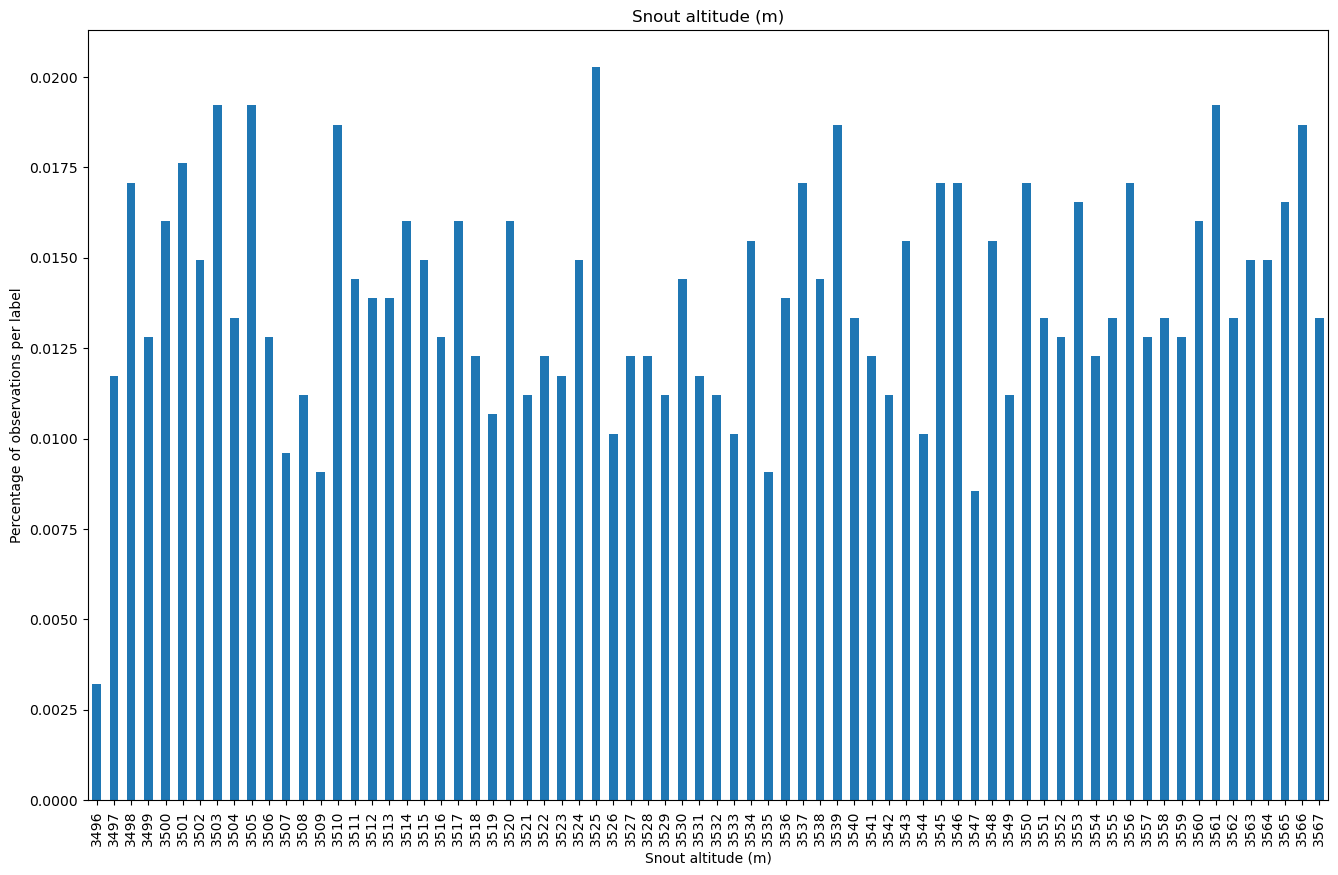

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()